In [1]:
#library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statistics as st
from collections import Counter

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#Ignore warning
import warnings
warnings.filterwarnings('ignore')

#Set max column
pd.set_option('display.max_columns', None)

#Set max rows
pd.set_option('display.max_rows', 500)

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn import metrics 
import xgboost as xgb


In [2]:
df = pd.read_csv('PHL_OPA_Properties_Clean.csv',index_col= 'Unnamed: 0')

In [3]:
df

,basements,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,interior_condition,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,state_code,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zip_code,zoning,lat,lng
0,D,ROW W/GAR 3 STY MASONRY,Single Family,N,49.00,5.0,0.0,15.90,1.0,B,5.0,186800.0,2.0,4.0,7.0,0.0,E,1001.0,ST,F,779.00,1650.0,H,I,1920.0,191475425,RSA5,-75.146866,39.931278
1,D,ROW 3 STY MASONRY,Single Family,Y,49.00,2.0,0.0,15.90,0.0,0,2.0,341600.0,1.0,3.0,0.0,0.0,E,1001.0,ST,F,779.10,1203.0,H,I,1920.0,191475425,RSA5,-75.146921,39.931286
2,D,ROW 3 STY MASONRY,Single Family,N,49.00,4.0,0.0,14.80,0.0,0,4.0,226200.0,1.0,4.0,0.0,2.0,E,1001.0,ST,F,725.20,1482.0,H,I,1920.0,191475425,RSA5,-75.146971,39.931292
3,D,ROW 3 STY MASONRY,Single Family,Y,100.00,4.0,0.0,14.33,0.0,0,4.0,241500.0,2.0,4.0,8.0,2.0,E,1001.0,ST,F,1433.00,2049.0,A,I,1920.0,191475425,RSA5,-75.147034,39.931230
4,C,ROW 3 STY MASONRY,Single Family,N,100.00,4.0,0.0,15.00,0.0,0,4.0,237000.0,2.0,4.0,0.0,3.0,E,1001.0,ST,F,1500.00,1155.0,H,I,1920.0,191475425,RSA5,-75.147087,39.931236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458015,0,RES CONDO 3 STY MAS+OTH,Single Family,Y,81.17,2.0,0.0,18.00,0.0,0,2.0,242300.0,0.0,2.0,4.0,3.0,E,1001.0,ST,F,1461.01,827.0,A,I,2018.0,19122.0,RM1,-75.146689,39.972628
458016,0,RES CONDO 3 STY MAS+OTH,Single Family,Y,81.17,2.0,0.0,18.00,0.0,0,2.0,274600.0,0.0,2.0,4.0,3.0,E,1001.0,ST,F,1461.01,1061.0,A,I,2018.0,19122.0,RM1,-75.146689,39.972628
458208,A,RES CONDO 3 STY MAS+OTH,Single Family,Y,77.75,2.0,0.0,17.67,0.0,0,2.0,301800.0,0.0,3.0,6.0,3.0,E,1001.0,ST,F,1373.61,1624.0,A,I,2019.0,191231308.0,RM1,-75.147196,39.969935
458209,0,RES CONDO 3 STY MAS+OTH,Single Family,Y,77.75,2.0,0.0,17.67,0.0,0,2.0,228700.0,0.0,2.0,4.0,3.0,E,1001.0,ST,F,1373.61,792.0,A,I,2019.0,191231308.0,RM1,-75.147196,39.969935


In [4]:
df['basements'] = df['basements'].replace(['0','A','B','C','D','E','F','G','H','I','J'],[0,10,9,8,7,6,5,4,3,2,1])

In [5]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

MemoryError: Unable to allocate 12.4 GiB for an array with shape (33230, 400560) and data type uint8

In [ ]:
X=df_dummy.drop(['market_value'],axis=1)
y=df_dummy['market_value']

In [ ]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    print('Model Performance')
    print('R2:', metrics.r2_score(y_test, predictions))
    print('Mean_Absolute_Error:', metrics.mean_absolute_error(y_test, predictions))
    print('Mean_Squared_Error:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
#split into Test and Train
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)
model = sm.OLS(y_train, X_train.astype(float)).fit()

# Print out the statistics
# evaluate Accuracy
evaluate(model, X_test, y_test)
print(model.summary())

Model Performance
R2: 0.6466529991962077
Mean_Absolute_Error: 51219.01050194523
Mean_Squared_Error: 7296360617.012828
RMSE: 85418.73692002725
                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     259.5
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:40:03   Log-Likelihood:            -4.6009e+06
No. Observations:              335399   AIC:                         9.203e+06
Df Residuals:                  335037   BIC:                         9.207e+06
Df Model:                         361                                         
Covariance Type:            nonrobust                                         
                                                          coef    st

*Insight:*
1. Berdasar OLS yang telah dilakukan, terlihat nilai R-squared yang didapat ialah 0.219, memiliki arti model yang digunakan akan menjelaskan sekitar 21.9% perubahan yang terjadi pada target market value. 
2. Omnibus bernilai 2051399.564 dan Prob. Omnibus bernilai 0 yang berarti data yang digunakan tidak terdistribusi normal. Data dapat dikatakan terdistribusi normal apabila Omnibus bernilai 0 dan Prob. Omnibus bernilai 1.
3. Dari semua fitur yang digunakan dapat dikatakan fitur fitur tersebut sangat berpengaruh pada target seperti diindikasikan oleh P value bernilai disektar 0 yang berarti memiliki 0% kemungkinan untuk tidak berpengaruh pada target.
4. Durbin-Watson bernilai 2.001 yang mengindikasikan homoscedasticity data kurang ideal, dimana idealnya nilainya berada diantara 1-2.
5. Condition number bernilai sangat tinggi yaitu 3.50e+23, dimana berarti data masih memiliki multicollinearity.

In [ ]:
# Function to calculate VIF
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 4, 'Yes--', 'No') 
    return (vif) 

In [ ]:
#calc_vif(df_dummy.drop(['market_value'],axis=1))

## **Cek Asumsi**

### **Asumsi-asumsi yang harus dipenuhi:**

1. **Linear relationship:** Terdapat hubungan linear antara variabel independen (x) dan variabel dependen (y).

2. **Independence:** Residuals bersifat independen atau tidak memiliki korelasi dengan residual lainnya. 

3. **Homoscedasticity:** Residual memiliki variance yang konstan.

4. **Normality:** Residual dari model terdistribusi dengan normal.

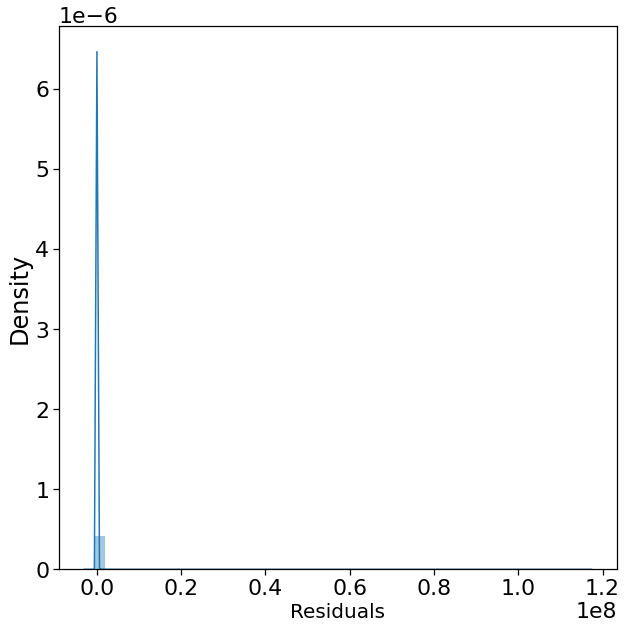

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.distplot(model.resid)
plt.xlabel('Residuals', fontsize = 20);

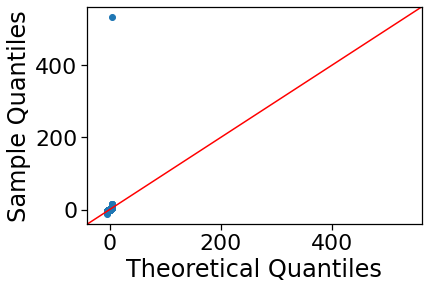

In [ ]:
# Cek dengan menggunakan QQ plot
sm.qqplot(model.resid, line = '45', fit=True);

KeyboardInterrupt: 

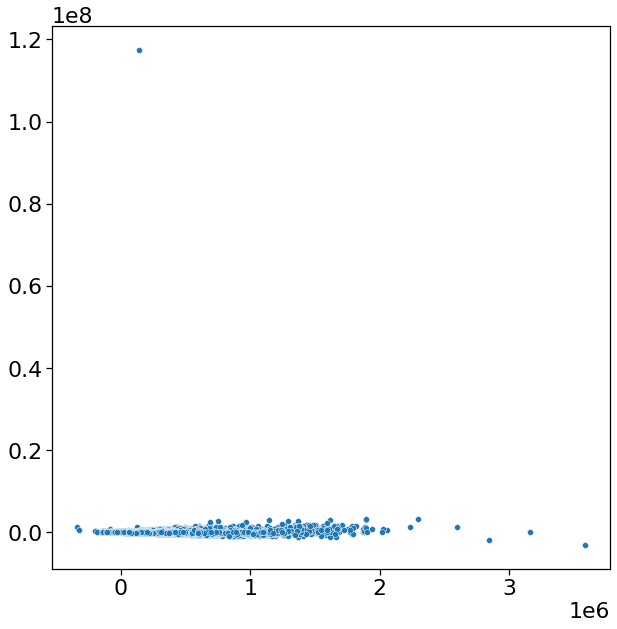

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.scatterplot(model.fittedvalues, model.resid)
sns.lineplot(model.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residual', fontsize=20);